In [309]:
# Import the required libraries
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import plotly.graph_objs as go
import string, os, random
import calendar
from PIL import Image

import folium 
from folium import plugins 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [310]:
#Import Dataset
path = "dataset.csv"
df = pd.read_csv(path)

#PCA
df = df.drop(['source_url','incident_url',
            'incident_url_fields_missing',
            'congressional_district',
            'sources','state_house_district',
            'state_senate_district'],axis=1)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['loss'] = df['n_killed'] + df['n_injured']

In [311]:
#2.1 Number of Gun Violence Incidents by Years

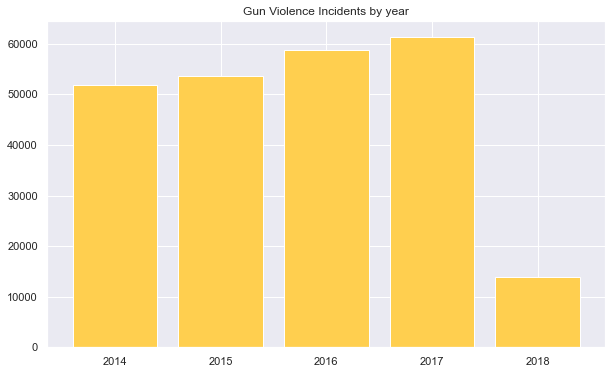

In [312]:
aggregated = df['year'].value_counts()
x_values = aggregated.index.tolist()
x_values = x_values[:-1]

y_values = aggregated.values.tolist()
y_values = y_values[:-1]

fig = plt.figure(figsize = (10, 6))
plt.bar(x_values, y_values, color="#ffcf4f")
plt.title("Gun Violence Incidents by year")
plt.show()


In [313]:
#2.2 Average number of incidents per month

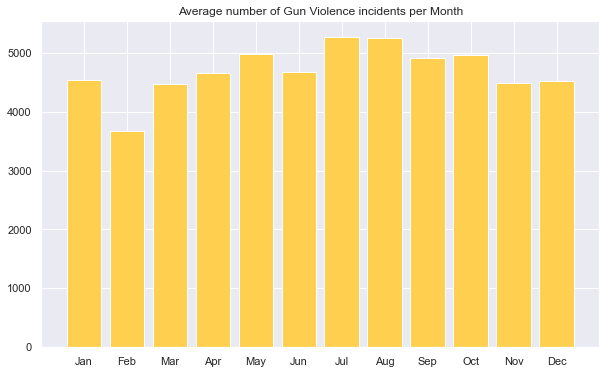

In [314]:
year_data = df[df['year'].isin([2014,2015,2016,2017])]
grp_year_data = year_data.groupby(['year','month']).agg({'month' : 'count'}).rename(columns={'month': 'month_count'}).reset_index()
month_count = grp_year_data.groupby(['month']).agg({'month_count' : 'mean'})
x2_values = month_count.index.tolist()
y2_values = month_count.month_count.tolist()

mapp = {}
for m,v in zip(x2_values, y2_values):
    mapp[m] = v

month_name = [calendar.month_abbr[int(x)] for x in sorted(x2_values)]
counts = [mapp[x] for x in sorted(x2_values)]

fig = plt.figure(figsize = (10,6))
plt.bar(month_name, counts, color="#ffcf4f")
plt.title("Average number of Gun Violence incidents per Month")
plt.show()


In [315]:
#2.3 Average number of by Day of the Week

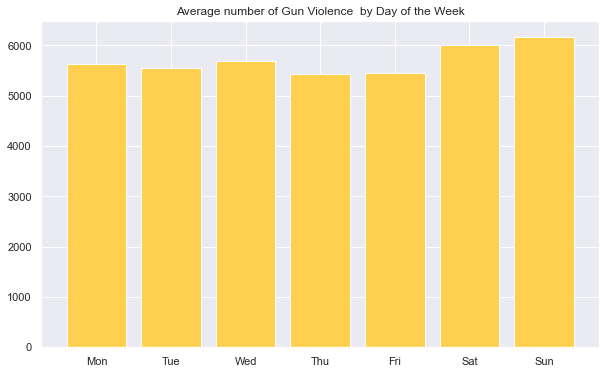

In [316]:
wd_count = df.groupby(['year', 'weekday']).agg({'weekday' : 'count'}).rename(columns={'weekday' : 'weekday_count'}).reset_index()
wd_mean = wd_count.groupby(['weekday']).agg({'weekday_count' : 'mean'})

x3_values = wd_mean.index.tolist()
y3_values = wd_mean.weekday_count.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x3_values = [weekmap[i] for i in x3_values]

wkmp = {}
for j,i in enumerate(x3_values):
   wkmp[i] = y3_values[j]

fig = plt.figure(figsize = (10,6))
plt.bar(list(weekmap.values()), y3_values, color="#ffcf4f")
plt.title("Average number of Gun Violence  by Day of the Week")
plt.show()

In [317]:
#2.4 Time Series plot of Total Incidents, People Killed, People Injured

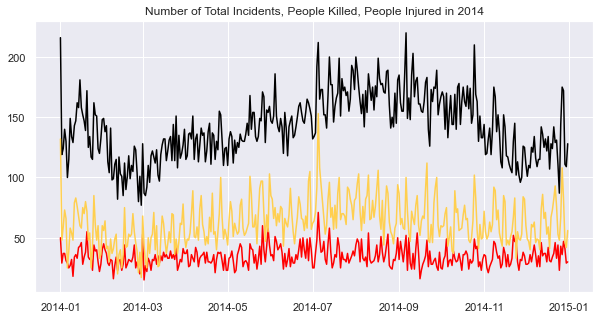

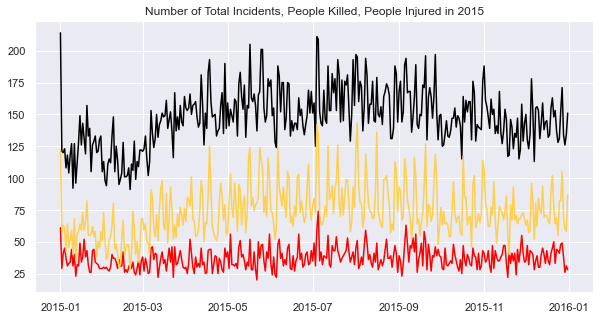

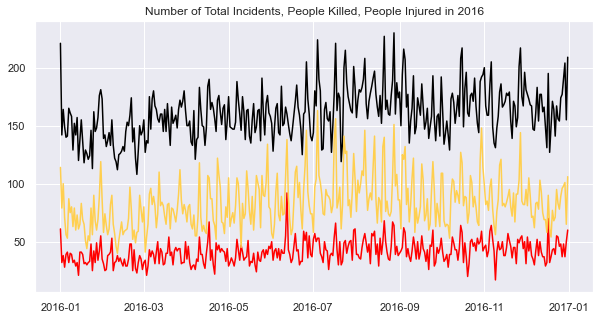

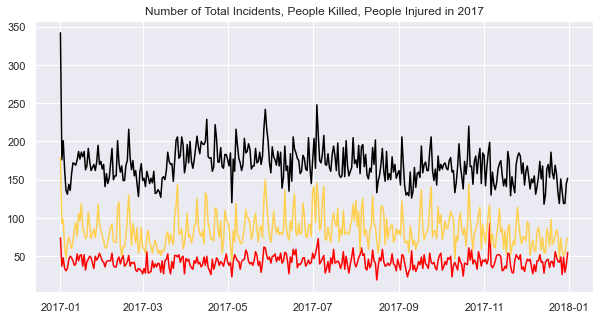

In [318]:
# 2014 time series
series_2014 = df[df['year'] == 2014].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})

fig = plt.figure(figsize = (10,5))
plt.plot(series_2014.date,series_2014.incidents,color="#000000")
plt.plot(series_2014.date,series_2014.n_killed,color="red")
plt.plot(series_2014.date,series_2014.n_injured,color="#ffcf4f")
plt.title("Number of Total Incidents, People Killed, People Injured in 2014")
plt.show()

# 2015 time series
series_2015 = df[df['year'] == 2015].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})

fig = plt.figure(figsize = (10,5))
plt.plot(series_2015.date,series_2015.incidents,color="#000000")
plt.plot(series_2015.date,series_2015.n_killed,color="red")
plt.plot(series_2015.date,series_2015.n_injured,color="#ffcf4f")
plt.title("Number of Total Incidents, People Killed, People Injured in 2015")
plt.show()

# 2016 time series
series_2016 = df[df['year'] == 2016].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})

fig = plt.figure(figsize = (10,5))
plt.plot(series_2016.date,series_2016.incidents,color="#000000")
plt.plot(series_2016.date,series_2016.n_killed,color="red")
plt.plot(series_2016.date,series_2016.n_injured,color="#ffcf4f")
plt.title("Number of Total Incidents, People Killed, People Injured in 2016")
plt.show()


# 2017 time series
series_2017 = df[df['year'] == 2017].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})

fig = plt.figure(figsize = (10,5))
plt.plot(series_2017.date,series_2017.incidents,color="#000000")
plt.plot(series_2017.date,series_2017.n_killed,color="red")
plt.plot(series_2017.date,series_2017.n_injured,color="#ffcf4f")
plt.title("Number of Total Incidents, People Killed, People Injured in 2017")
plt.show()

In [319]:
#3.1 Number of Incidents by every state

In [320]:
states_df = df['state'].value_counts()

statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, '#ffec4f'],[0.2, '#ffde4f'],
       [0.4, '#ffcf4f'],[0.6, '#ffc04f'],
       [0.8, '#ffb24f'],[1.0, '#ffa34f']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['state'],
        marker = dict(
            line = dict (
                color = '#000000',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'State wise number of Gun Violence Incidents',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = '#FFFFFF'),
             )

fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [321]:
#3.2 Total Loss (Injured + Killed) by every state

In [322]:
statdf = df.reset_index().groupby(by=['state']).agg({'loss':'sum', 'year':'count'}).rename(columns={'year':'count'})
statdf['state'] = statdf.index

trace1 = go.Bar(x=statdf['state'],y=statdf['count'],name='Count of Incidents',marker=dict(color='#ffcf4f'))
trace2 = go.Bar(x=statdf['state'],y=statdf['loss'],name='Total Loss',marker=dict(color='#aabc9f'))

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    margin=dict(b=150),
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'State wise number of Gun Violence Incidents and Total Loss',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [323]:
#3.3 Incidents Per 100,000 People by State

In [324]:
census_2013 = {'Mississippi': 2991207, 'Iowa': 3090416, 'Oklahoma': 3850568, 'Delaware': 925749, 'Minnesota': 5420380, 'Alaska': 735132, 'Illinois': 12882135, 'Arkansas': 2959373, 'New Mexico': 2085287, 'Indiana': 6570902, 'Maryland': 5928814, 'Louisiana': 4625470, 'Texas': 26448193, 'Wyoming': 582658, 'Arizona': 6626624, 'Wisconsin': 5742713, 'Michigan': 9895622, 'Kansas': 2893957, 'Utah': 2900872, 'Virginia': 8260405, 'Oregon': 3930065, 'Connecticut': 3596080, 'New York': 19651127, 'California': 38332521, 'Massachusetts': 6692824, 'West Virginia': 1854304, 'South Carolina': 4774839, 'New Hampshire': 1323459, 'Vermont': 626630, 'Georgia': 9992167, 'North Dakota': 723393, 'Pennsylvania': 12773801, 'Florida': 19552860, 'Hawaii': 1404054, 'Kentucky': 4395295, 'Rhode Island': 1051511, 'Nebraska': 1868516, 'Missouri': 6044171, 'Ohio': 11570808, 'Alabama': 4833722, 'South Dakota': 844877, 'Colorado': 5268367, 'Idaho': 1612136, 'New Jersey': 8899339, 'Washington': 6971406, 'North Carolina': 9848060, 'Tennessee': 6495978, 'Montana': 1015165, 'District of Columbia': 646449, 'Nevada': 2790136, 'Maine': 1328302}

statesdf['population'] = statesdf['state'].apply(lambda x : census_2013[x])
statesdf['incidents_per_k'] = statesdf.apply(lambda x : float(x['counts'])*100000 / x['population'], axis=1)

tempdf = statesdf.sort_values('incidents_per_k', ascending = False)[1:50]

trace1 = go.Bar(
    x=tempdf.state,
    y=tempdf.incidents_per_k,
    name='Location Types',
    orientation = 'v',
    marker=dict(color='black'),
    opacity=0.7
)

data = [trace1]

layout = go.Layout(
    height=400,
    margin=dict(b=150),
    barmode='group',
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'Gun Violence Incidents Per 100,000 people by State',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [325]:
population = {'Carol Stream': '40069', 'La Quinta': '40956', 'Leander': '42761', 'Edinburg': '87650', 'Chino Hills': '78822', 'Pinellas Park': '52137', 'Pacifica': '39062', 'San Luis Obispo': '47536', 'Apache Junction': '39954', 'Toledo': '278508', 'Nampa': '91382', 'Jurupa Valley': '103541', 'Renton': '100953', 'Joplin': '52195', 'Pomona': '152494', 'Hoover': '84978', 'Columbia': '134309', 'Maple Grove': '69576', 'Rowlett': '61999', 'Bayonne': '66238', 'Fremont': '233136', 'Scottsdale': '246645', 'Bozeman': '45250', 'El Paso': '683080', 'Santa Maria': '106290', 'Cedar Park': '68918', 'Shelton': '41334', 'Atlanta': '472522', 'Kettering': '55306', 'Bartlett': '58622', 'Orem': '97499', 'Bullhead City': '39970', 'Bradenton': '55687', 'Waterloo': '67934', 'Scranton': '77291', 'Glendora': '51851', 'Lakeland': '106420', 'West Valley City': '136574', 'Moreno Valley': '205499', 'Brea': '42471', 'Normal': '54264', 'Bolingbrook': '74518', 'Rocky Mount': '55466', 'Redding': '91808', 'Chico': '91567', 'Virginia Beach': '452602', 'Charlotte': '842051', 'Parker': '51163', 'Bloomington': '85319', 'Wake Forest': '40112', 'Beaumont': '118299', 'Huntersville': '54839', 'Oakland Park': '44326', 'Beavercreek': '46376', 'Broken Arrow': '107403', 'Seattle': '704352', 'Santa Barbara': '91930', 'Sandy': '95836', 'El Monte': '115807', 'Grand Island': '51517', 'Santa Monica': '92478', 'Ocala': '59253', 'Oro Valley': '43781', 'Waco': '134432', 'Midwest City': '57305', 'Allentown': '120443', 'Garden Grove': '174858', 'Bellflower': '77790', 'Denver': '693060', 'Minot': '48743', 'Des Plaines': '58141', 'Burlington': '52709', 'Orange': '140504', 'Dunwoody': '48884', 'San Mateo': '103959', 'Minnetonka': '52369', 'Eagan': '66428', 'Oceanside': '175464', 'Avondale': '82881', 'Alameda': '78906', 'San Diego': '1406630', 'Haverhill': '62873', 'Waukegan': '88182', 'Daytona Beach': '66645', 'Grove City': '39721', 'Altoona': '44589', 'Hamilton': '62127', 'Kirkland': '87701', 'Honolulu': '351792', 'Macon-Bibb County': '152555', 'Stillwater': '49504', 'Colorado Springs': '465101', 'Cedar Hill': '48343', 'Jupiter': '63813', 'Overland Park': '188966', 'Boise City': '223154', 'Missoula': '72364', 'Burbank': '104447', 'Youngstown': '64312', 'Sunnyvale': '152771', 'Hoboken': '54379', 'Ankeny': '58627', 'Harrisonburg': '53078', 'Rancho Santa Margarita': '48969', 'Fitchburg': '40414', 'Revere': '53157', 'Fountain Valley': '56529', 'San Bruno': '42957', 'Pembroke Pines': '168587', 'Friendswood': '39396', 'Bountiful': '44078', 'Terre Haute': '60852', 'Methuen': '49917', 'Las Vegas': '632912', 'South San Francisco': '66980', 'Cedar Falls': '41390', 'Carlsbad': '113952', 'Quincy': '93688', 'Waterbury': '108272', 'Thornton': '136703', 'Mount Pleasant': '84170', 'Livermore': '89115', 'Lansing': '116020', 'Richmond': '223170', 'Providence': '179219', 'Clearwater': '114361', 'Pasadena': '153351', 'Clovis': '106583', 'Augusta-Richmond County': '197081', 'Lacey': '47688', 'East Providence': '47337', 'Columbus': '860090', 'Indianapolis': '855164', 'Danbury': '84992', 'Sarasota': '56610', 'Mountain View': '80447', 'South Bend': '101735', 'Watsonville': '53796', 'Ann Arbor': '120782', 'Valdosta': '56474', 'Berwyn': '55748', 'Akron': '197633', 'Memphis': '652717', 'Enid': '51004', 'Brighton': '38314', 'Lake Charles': '76848', 'West Lafayette': '45872', 'Littleton': '46333', 'Orlando': '277173', 'Loveland': '76897', 'Spanish Fork': '38861', 'Edmonds': '41840', 'Goose Creek': '42039', 'Monterey Park': '61075', 'Woburn': '39452', 'Upland': '76684', 'Edina': '51350', 'Bowling Green': '65234', 'Oxnard': '207906', 'San Rafael': '58954', 'Costa Mesa': '112822', 'Roseville': '132671', 'Birmingham': '212157', 'Bothell': '44546', 'Buckeye': '64629', 'Oklahoma City': '638367', 'Broomfield': '66529', 'Hattiesburg': '46926', 'West Des Moines': '64560', 'Denton': '133808', 'Weslaco': '40033', 'Flagstaff': '71459', 'Annapolis': '39418', 'Yucaipa': '53309', 'West Palm Beach': '108161', 'West Jordan': '113699', 'Bonita Springs': '54198', 'Plainfield': '50636', 'Buffalo Grove': '41346', 'Utica': '60652', 'Paterson': '147000', 'Fond du Lac': '42951', 'Harlingen': '65539', 'Ocoee': '44820', 'Moline': '42250', 'Paramount': '54909', 'Winter Garden': '41988', 'Phoenix': '1615017', 'State College': '41992', 'Irving': '238289', 'Edmond': '91191', 'Manhattan': '54983', 'Pocatello': '54746', 'Hartford': '123243', 'Missouri City': '74561', 'Summerville': '49323', 'Joliet': '148262', 'Azusa': '49628', 'Alpharetta': '65338', 'Boynton Beach': '75569', 'North Las Vegas': '238702', 'Sioux Falls': '174360', 'Chattanooga': '177571', 'Port Orange': '61105', 'Federal Way': '96757', 'Lexington-Fayette': '318449', 'Riverton': '42838', 'Chesapeake': '237940', 'Compton': '97550', 'Smyrna': '56664', 'Rock Island': '38210', 'Duluth': '86293', 'Petaluma': '60530', 'Doral': '57947', 'Wheaton': '53389', 'Oak Park': '51774', 'Wheeling': '38315', 'St. Louis': '311404', 'Ceres': '48278', 'Tallahassee': '190894', 'Lakewood': '154393', 'Mount Prospect': '54171', 'Nashua': '87882', 'Rocklin': '62787', 'Woonsocket': '41406', 'Salinas': '157218', 'Janesville': '64159', 'New Rochelle': '79557', 'Euclid': '47360', 'Turlock': '72796', 'Schenectady': '64913', 'McKinney': '172298', 'Yorba Linda': '68235', 'Redondo Beach': '67867', 'Bowie': '58393', 'Grapevine': '51971', 'Arlington': '392772', 'Perth Amboy': '52499', 'Wyoming': '75567', 'Montgomery': '200022', 'Newark': '281764', 'Apple Valley': '72553', 'Wilson': '49620', 'Sandy Springs': '105703', 'Charlottesville': '46912', 'Warwick': '81579', 'Pico Rivera': '63635', 'Irvine': '266122', 'Waltham': '63002', 'Chesterfield': '47659', 'Palm Beach Gardens': '53778', 'Lodi': '64641', 'Stanton': '38644', 'Thousand Oaks': '128888', 'Harrisburg': '48904', 'Elyria': '53715', 'Marlborough': '39697', 'Menifee': '88531', 'Fort Wayne': '264488', 'Conroe': '82286', 'Medford': '81636', 'Rochester Hills': '73422', 'Jonesboro': '74889', 'Carrollton': '133351', 'Lenexa': '52903', 'West New York': '53343', 'Vallejo': '121299', 'Cutler Bay': '44707', 'Norfolk': '245115', 'Rogers': '65021', 'Colton': '54712', 'Miami': '453579', 'Lorain': '63730', 'Kyle': '39060', 'Cerritos': '50555', 'Topeka': '126808', 'Kenosha': '99631', 'New Britain': '72558', 'Brookhaven': '52444', 'Glenview': '47475', 'Montclair': '38944', 'Tigard': '51902', 'Indio': '88488', 'East Lansing': '48870', 'North Port': '64274', 'Pittsburg': '70679', 'Savannah': '146763', 'Newton': '89045', 'Pharr': '77320', 'Fort Worth': '854113', 'McAllen': '142212', 'Palm Coast': '85109', 'North Little Rock': '66278', 'Gary': '76424', 'Orland Park': '58862', 'Gilroy': '55069', 'Coppell': '41360', 'Maricopa': '46903', 'Pearland': '113570', 'Sparks': '98345', 'Evanston': '74895', 'San Clemente': '65309', 'Hesperia': '93724', 'Port St. Lucie': '185132', 'Reading': '87575', 'Rosemead': '54500', 'Gilbert': '237133', 'Laredo': '257156', 'Folsom': '77271', 'Bossier City': '68485', 'Elizabeth': '128640', 'Westland': '81545', 'Everett': '109043', 'Hawthorne': '88031', 'Dubuque': '58531', 'Hilton Head Island': '40500', 'Palm Bay': '110104', 'Newport News': '181825', 'Hanford': '55547', 'Manchester': '110506', 'Chino': '87776', 'Euless': '54769', 'Cranston': '81034', 'Miami Beach': '91917', 'St. Charles': '69293', 'Florissant': '51776', 'Diamond Bar': '56793', 'Iowa City': '74398', 'Kentwood': '51689', 'Barnstable Town': '44254', 'Frisco': '163656', 'Tucson': '530706', 'Apopka': '49458', 'Urbandale': '43018', 'St. Louis Park': '48747', 'Westfield': '41552', 'Redwood City': '84950', 'Buffalo': '256902', 'Cambridge': '110651', 'Lake Oswego': '38945', 'Boston': '673184', 'Kennewick': '80454', 'Dayton': '140489', 'Delray Beach': '67371', 'Layton': '75655', 'Owensboro': '59273', 'Sunrise': '93734', 'Arlington Heights': '75525', 'Huntington': '48113', 'Erie': '98593', 'Longview': '82055', 'Norwalk': '106178', 'Sanford': '58605', 'Ontario': '173212', 'Eastvale': '61151', 'Georgetown': '67140', 'Noblesville': '60183', 'Jackson': '169148', 'Hollywood': '151998', 'New Braunfels': '73959', 'Miramar': '138449', 'West Haven': '54516', 'Prescott Valley': '43132', 'Novi': '59211', 'Rancho Palos Verdes': '42435', 'Placentia': '52228', 'Miami Gardens': '113058', 'Alhambra': '85474', 'Jeffersonville': '47124', 'Blue Springs': '54431', 'Shreveport': '194920', 'Escondido': '151613', 'Mesa': '484587', 'Cathedral City': '54056', 'Sioux City': '82872', 'Lincoln': '280364', 'Great Falls': '59178', 'Vineland': '60525', 'Rockville': '66940', 'Hagerstown': '40452', 'La Crosse': '52109', 'Fort Smith': '88133', 'Tinley Park': '56831', 'Malden': '60840', 'Beverly': '41365', 'Lawton': '94653', 'Flower Mound': '73547', 'Kalamazoo': '75984', 'Wichita Falls': '104724', 'Concord': '128726', 'Morgan Hill': '44155', 'Anderson': '55130', 'Schertz': '39453', 'Auburn': '77472', 'New York': '8537673', 'Hendersonville': '57050', 'Hurst': '39160', 'Casper': '59324', 'Ormond Beach': '42162', 'Buena Park': '83156', 'Haltom City': '44361', 'Rockwall': '43586', 'Abilene': '122225', 'Crystal Lake': '40339', 'Lubbock': '252506', 'Sumter': '40723', 'Philadelphia': '1567872', 'Westminster': '113875', 'Downey': '113267', 'Parma': '79425', 'Danville': '44631', 'DeKalb': '43194', 'Fort Myers': '77146', 'North Lauderdale': '43699', 'Torrance': '147195', 'Odessa': '117871', 'Sayreville': '44905', 'Shoreline': '55333', 'Muskogee': '38352', 'Mankato': '41720', 'Linden': '42457', 'Logan': '50676', 'Grand Junction': '61881', 'Grand Rapids': '196445', 'Carpentersville': '38291', 'Antioch': '110898', 'Sheboygan': '48686', 'Appleton': '74370', 'Dothan': '68468', 'Decatur': '72706', 'Pueblo': '110291', 'Greenacres': '40013', 'Hallandale Beach': '39500', 'Elk Grove': '169743', 'Cape Girardeau': '39628', 'Ogden': '86701', 'Frederick': '70060', 'Lafayette': '127626', 'Manassas': '41483', 'Prescott': '42513', 'Kannapolis': '47839', 'San Bernardino': '216239', 'Pleasant Grove': '38756', 'Romeoville': '39706', 'El Centro': '44201', 'Galveston': '50550', 'Trenton': '84056', 'Fall River': '88930', 'Chapel Hill': '59246', 'Coral Gables': '50815', 'Union City': '75322', 'Coon Rapids': '62359', 'Suffolk': '89273', 'Lauderhill': '71626', 'Encinitas': '63131', 'Bend': '91122', 'La Puente': '40377', 'Corpus Christi': '325733', 'Marion': '38480', 'Duncanville': '39457', 'Hickory': '40567', 'Sierra Vista': '43208', 'Hammond': '77134', 'Shawnee': '65194', 'South Gate': '95538', 'Burnsville': '61290', 'Ames': '66191', 'Davis': '68111', 'Clarksville': '150287', 'Kent': '127514', 'Charleston': '134385', 'Collierville': '49177', 'Lynchburg': '80212', 'Independence': '117030', 'Henderson': '292969', 'Redmond': '62458', 'Tulsa': '403090', 'Laguna Niguel': '65328', 'Sacramento': '495234', 'Johns Creek': '83873', 'Lewisville': '104659', 'York': '43859', 'Fishers': '90127', 'DeSoto': '52599', 'Biloxi': '45975', 'Whittier': '86883', 'Camarillo': '67363', 'Redlands': '71288', 'The Colony': '42408', 'Saginaw': '48984', 'Altamonte Springs': '43492', 'Dublin': '59583', 'Jefferson City': '43013', 'Cedar Rapids': '131127', 'Mentor': '46732', 'Sherman': '41567', 'Rio Rancho': '96028', 'Largo': '83065', 'St. Cloud': '67641', 'Niagara Falls': '48632', 'Santa Clarita': '181972', 'Olympia': '51202', 'Warner Robins': '74388', 'Moore': '61415', 'Sammamish': '63773', 'Washington': '681170', 'Covington': '40797', 'Minneapolis': '413651', 'Cuyahoga Falls': '49206', 'Visalia': '131074', 'Livonia': '94041', 'Salt Lake City': '193744', 'Casa Grande': '54534', 'Allen': '99179', 'Chula Vista': '267172', 'Pawtucket': '71427', 'White Plains': '58241', 'Camden': '74420', 'Manteca': '76908', 'Gulfport': '72076', 'Rochester': '208880', 'Fontana': '209665', 'Knoxville': '186239', 'San Leandro': '90465', 'Arvada': '117453', 'Rapid City': '74048', 'Kokomo': '57799', 'Bremerton': '40675', 'Cheyenne': '64019', 'Grand Forks': '57339', 'Surprise': '132677', 'Downers Grove': '49473', 'San Buenaventura (Ventura)': '109592', 'Evansville': '119477', 'St. Peters': '57289', 'Cicero': '82992', 'Coral Springs': '130059', 'Poway': '50077', 'Southaven': '53214', 'Taylorsville': '60436', 'Pontiac': '59698', 'Hempstead': '55555', 'Wausau': '38872', 'Aurora': '361710', 'Lehi': '61130', 'New Orleans': '391495', 'Elmhurst': '46387', 'Los Angeles': '3976322', 'Strongsville': '44631', 'San Antonio': '1492510', 'Rockford': '147651', 'Marana': '43474', 'Kenner': '67089', 'North Charleston': '109298', 'Bell Gardens': '42806', 'Bridgeport': '145936', 'Hoffman Estates': '51738', 'Blacksburg': '45038', 'Milford': '52536', 'Tustin': '80395', 'Round Rock': '120892', 'Streamwood': '40166', 'College Station': '112141', 'Sugar Land': '88177', 'Pompano Beach': '109393', 'Maplewood': '40150', 'Cupertino': '60643', 'Portsmouth': '95252', 'Daly City': '106472', 'Battle Creek': '51534', 'Santa Fe': '83875', 'Holyoke': '40280', 'Modesto': '212175', 'Mesquite': '143736', 'La Mirada': '49216', 'Eden Prairie': '63914', 'Tacoma': '211277', 'Cypress': '48906', 'Weymouth Town': '55972', 'Palm Springs': '47689', 'Santa Clara': '125948', 'Kearny': '42126', 'Delaware': '38643', 'Fullerton': '140721', 'San Gabriel': '40404', 'Schaumburg': '74446', 'Santa Ana': '334217', 'Riverside': '324722', 'Lompoc': '43712', 'Temple': '73600', 'Peachtree Corners': '42773', 'Cary': '162320', 'Victorville': '122265', 'Johnson City': '66677', 'Chicago': '2704958', 'Cape Coral': '179804', 'Farmington': '41629', 'Apex': '47349', 'El Cajon': '103768', 'Marietta': '60941', 'Mansfield': '65631', 'Perris': '76331', 'Twin Falls': '48260', 'League City': '102010', 'Germantown': '39056', 'Rohnert Park': '42622', 'New Bedford': '95032', 'Port Arthur': '55427', 'Leominster': '41663', 'Puyallup': '40640', 'Wellington': '63900', 'West Allis': '60087', 'Anaheim': '351043', 'Richardson': '113347', 'Fayetteville': '204759', 'Davenport': '102612', 'New Brunswick': '56910', 'Sterling Heights': '132427', 'Elgin': '112123', "Lee's Summit": '96076', 'Conway': '65300', 'Deltona': '90124', 'North Miami Beach': '43891', 'Merced': '82594', 'Worcester': '184508', 'Delano': '52707', 'Martinez': '38259', 'Salem': '167419', 'Bethlehem': '75293', 'St. George': '82318', 'Cleveland': '385809', 'Campbell': '40939', 'Lynwood': '71187', 'Leesburg': '52607', 'Somerville': '81322', 'City': '2016 Population', 'Temecula': '113054', 'Inglewood': '110654', 'Bismarck': '72417', 'Murrieta': '111674', 'Pensacola': '53779', 'Hackensack': '44756', 'Plantation': '92706', 'St. Clair Shores': '59775', 'Coachella': '44953', 'Chandler': '247477', 'Lowell': '110558', 'Oak Lawn': '56257', 'Mishawaka': '48679', 'Norwich': '39556', 'Huntsville': '193079', 'Lake Havasu City': '53743', 'Amarillo': '199582', 'Hemet': '84281', 'Mobile': '192904', 'Fort Pierce': '45295', 'Rancho Cordova': '72326', 'San Ramon': '75639', 'Oshkosh': '66579', 'Muskegon': '38349', 'Plano': '286057', 'Beaverton': '97590', 'Waukesha': '72363', 'San Angelo': '100702', 'Centennial': '109932', 'Bakersfield': '376380', 'Gastonia': '75536', 'Chelsea': '39699', 'Anchorage': '298192', 'Athens-Clarke County': '123371', 'Freeport': '43279', 'Kansas City': '481420', 'Skokie': '64270', 'Deerfield Beach': '79764', 'Culver City': '39364', 'Raleigh': '458880', 'Bristol': '60147', 'Glendale': '245895', 'Monroe': '49297', 'Rialto': '103314', 'Carmel': '91065', 'Houston': '2303482', 'Hampton': '135410', 'Garland': '234943', 'Cleveland Heights': '44633', 'Gresham': '111523', 'Reno': '245255', 'Council Bluffs': '62524', 'Citrus Heights': '87432', 'Des Moines': '215472', 'Milwaukee': '595047', 'Portland': '639863', 'Elkhart': '52221', 'St. Paul': '302398', 'Roanoke': '99660', 'Albany': '98111', 'Middletown': '48813', 'Richland': '54989', 'Woodland': '59068', 'Provo': '116868', 'Titusville': '46019', 'Tamarac': '65199', 'Tyler': '104798', 'Indian Trail': '38222', 'Santa Rosa': '175155', 'San Francisco': '870887', 'Plant City': '38200', 'Yuma': '94906', 'Spokane Valley': '96340', 'Bellevue': '141400', 'Champaign': '86637', 'Shakopee': '40610', 'Grand Prairie': '190682', 'Victoria': '67670', 'Flint': '97386', 'Marysville': '67626', 'Berkeley': '121240', 'Oakley': '40622', 'Dearborn': '94444', 'Palmdale': '157356', 'Chicopee': '55991', 'Tampa': '377165', 'Greenwood': '56545', 'Palm Desert': '52231', 'East Orange': '64789', 'Pine Bluff': '43841', 'Corona': '166785', 'Winston-Salem': '242203', 'Bellingham': '87574', 'Burleson': '45016', 'Castle Rock': '57666', 'Attleboro': '44434', 'Canton': '71323', 'Walnut Creek': '69122', 'Alexandria': '155810', 'Cincinnati': '298800', 'Fresno': '522053', 'West Covina': '107847', 'Kingsport': '52806', 'Hialeah': '236387', 'Long Beach': '470130', 'Troy': '83641', 'Durham': '263016', 'Wilkes-Barre': '40569', 'San Jacinto': '47413', 'San Marcos': '95261', 'Naperville': '147122', 'Warren': '135125', 'Rock Hill': '72937', 'Milpitas': '77528', 'Santee': '57834', 'Lynn': '92697', 'Caldwell': '53149', 'Gainesville': '131591', 'Palatine': '68766', 'Napa': '80416', 'Baytown': '75992', 'Louisville/Jefferson County': '616261', 'Baldwin Park': '76464', 'National City': '61147', 'Muncie': '69010', 'Goodyear': '77258', 'Meridian': '95623', 'Eugene': '166575', 'Murfreesboro': '131947', 'Jersey City': '264152', 'Draper': '47328', 'Passaic': '70635', 'Pittsburgh': '303625', 'Yakima': '93986', 'Albuquerque': '559277', 'Nashville-Davidson': '660388', 'North Richland Hills': '69798', 'Brockton': '95630', 'Syracuse': '143378', 'Arcadia': '58523', 'Spokane': '215973', 'Killeen': '143400', 'Wichita': '389902', 'San Jose': '1025350', 'Davie': '101871', 'High Point': '111223', 'Las Cruces': '101759', 'Longmont': '92858', 'Margate': '57870', 'Brownsville': '183823', 'Oviedo': '39337', 'Madison': '252551', 'Taylor': '61177', 'Fort Collins': '164207', 'Westerville': '38985', 'Atlantic City': '38735', 'Peabody': '52491', 'Commerce City': '54869', 'Tuscaloosa': '99543', 'Roy': '38201', 'Blaine': '62892', 'La Habra': '61664', 'Huntington Beach': '200652', 'Keizer': '38980', 'Brooklyn Park': '79707', 'Rancho Cucamonga': '176534', 'Pasco': '70579', 'Salina': '47336', 'Midland': '134610', 'Dallas': '1317929', 'Urbana': '42014', 'Novato': '56004', 'Winter Haven': '38953', 'Greenville': '91495', 'St. Petersburg': '260999', 'Fairfield': '114756', 'Portage': '48508', 'Meriden': '59622', 'Tulare': '62779', 'Corvallis': '57110', 'Racine': '77571', 'Boulder': '108090', 'Fort Lauderdale': '178752', 'Findlay': '41422', 'Norman': '122180', 'Lawrence': '95358', 'Aliso Viejo': '51424', 'Baton Rouge': '227715', 'Asheville': '89121', 'Santa Cruz': '64465', 'Newport Beach': '86688', 'Binghamton': '45672', 'Billings': '110323', 'Olathe': '135473', 'Kissimmee': '69369', 'Vacaville': '98303', 'Calexico': '40232', 'Homestead': '67996', 'Green Bay': '105139', 'Bryan': '83260', 'Boca Raton': '96114', 'Bedford': '49528', "Coeur d'Alene": '50285', 'Hutchinson': '41310', 'Little Rock': '198541', 'Detroit': '672795', 'Lake Forest': '83240', 'Belleville': '41906', 'Franklin': '74794', 'Porterville': '58978', 'New Berlin': '39803', 'Highland': '54939', 'Austin': '947890', 'Greensboro': '287027', 'Southfield': '73100', 'Lake Elsinore': '64205', 'Stockton': '307072', 'Mission Viejo': '96396', 'Mount Vernon': '68344', 'Greeley': '103990', 'Madera': '64444', 'Murray': '49230', 'Pleasanton': '82270', 'Lombard': '43815', 'Lakeville': '61938', 'North Miami': '62139', 'Gaithersburg': '67776', 'Florence': '39959', 'Bentonville': '47093', 'Lancaster': '160106', 'Vista': '101659', 'Wylie': '47701', 'Yonkers': '200807', 'Springdale': '78557', 'Huntington Park': '58879', 'Dearborn Heights': '55761', 'Texas City': '48262', 'Pflugerville': '59245', 'Carson': '92797', 'Fargo': '120762', 'Idaho Falls': '60211', 'Vancouver': '174826', 'Little Elm': '42504', 'Hillsboro': '105164', 'Springfield': '167319', 'Coconut Creek': '59405', 'Weston': '70015', 'Wauwatosa': '47945', 'Tempe': '182498', 'Woodbury': '68820', 'Simi Valley': '126327', 'St. Joseph': '76472', 'Farmington Hills': '81129', 'South Jordan': '69034', 'Tracy': '89274', 'Hayward': '158937', 'Jacksonville': '880619', 'Milton': '38411', 'Carson City': '54742', 'Omaha': '446970', 'Northglenn': '38982', 'Yuba City': '66845', 'Wilmington': '117525', 'Gardena': '60048', 'Melbourne': '81185', 'Plymouth': '77216', 'Palo Alto': '67024', "O'Fallon": '86274', 'Eau Claire': '68339', 'Baltimore': '614664', 'Brentwood': '60532', 'New Haven': '129934', 'Covina': '48549', 'Pittsfield': '42846', 'Roswell': '94598', 'Taunton': '56843', 'Tupelo': '38842', 'Clifton': '85845', 'Mission': '83563', 'Montebello': '63335', 'West Sacramento': '52981', 'La Mesa': '59948', 'Royal Oak': '59006', 'Stamford': '129113', 'Keller': '46646', 'Moorhead': '42492', 'Oakland': '420005', 'Peoria': '164173', 'Burien': '50997'}
df['city_population'] = df['city_or_county'].apply(lambda x : int(population[x]) if x in population else 0)

In [326]:
#3.4 Population Adjusted Dataset - Top Cities (Incidents Per 100,000 People)

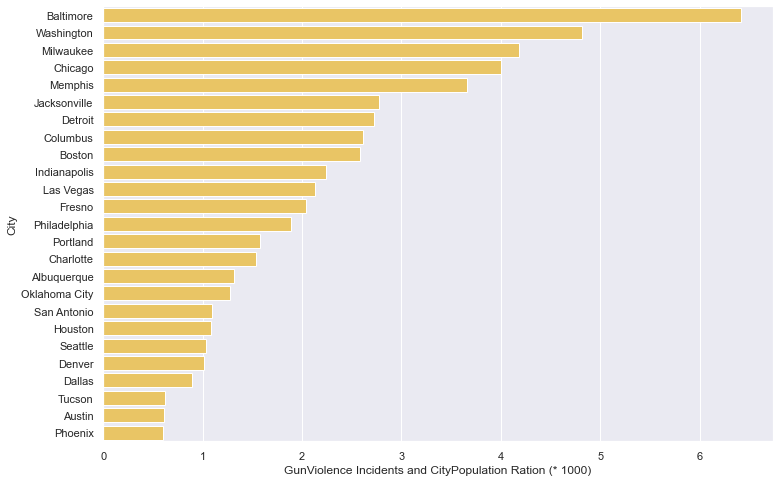

In [327]:
tempdf = df.groupby(by=['city_or_county']).agg({'n_killed': 'sum', 'n_injured' : 'sum', 'city_population' : 'mean', 'state' : 'count'}).reset_index().rename(columns={'state' : 'total_incidents', 'n_killed' : 'total_killed', 'n_injured' : 'total_injured'})
tempdf['incidents_population_ratio'] = 1000*tempdf['total_incidents'] / (tempdf['city_population']+1) 
tempdf['killed_population_ratio'] = 1000*tempdf['total_killed'] / (tempdf['city_population']+1) 
tempdf['injured_population_ratio'] = 1000*tempdf['total_injured'] / (tempdf['city_population']+1) 
tempdf['loss_population_ratio'] = 1000*(tempdf['total_killed'] + tempdf['total_injured']) / (tempdf['city_population']+1) 

i_p = tempdf.sort_values(['incidents_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y='city_or_county', x='incidents_population_ratio', data=i_p, color='#ffcf4f')
ax.set(xlabel='GunViolence Incidents and CityPopulation Ration (* 1000)', ylabel='City');

In [328]:
#3.5 Population Adjusted Dataset - Top Cities (People Killed Per 100,000 People)

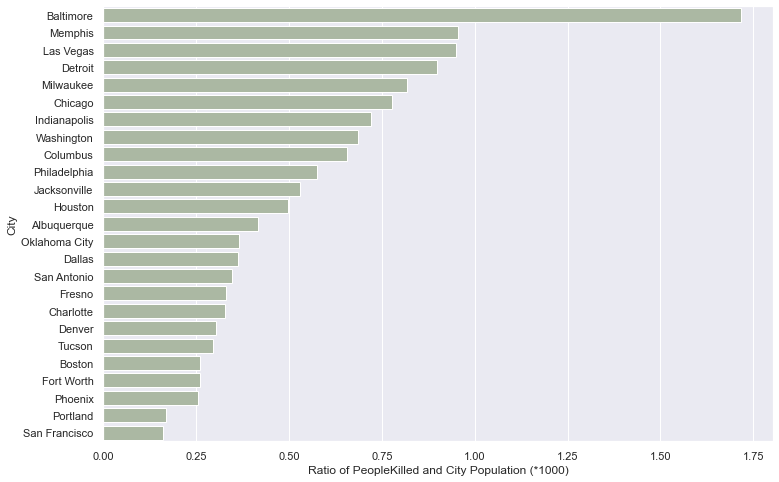

In [329]:
i_p = tempdf.sort_values(['killed_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y='city_or_county', x='killed_population_ratio', data=i_p, color='#aabc9f')
ax.set(xlabel='Ratio of PeopleKilled and City Population (*1000)', ylabel='City');

In [330]:
#3.6 Population Adjusted Dataset - Top Cities (People Injured Per 100,000 People)

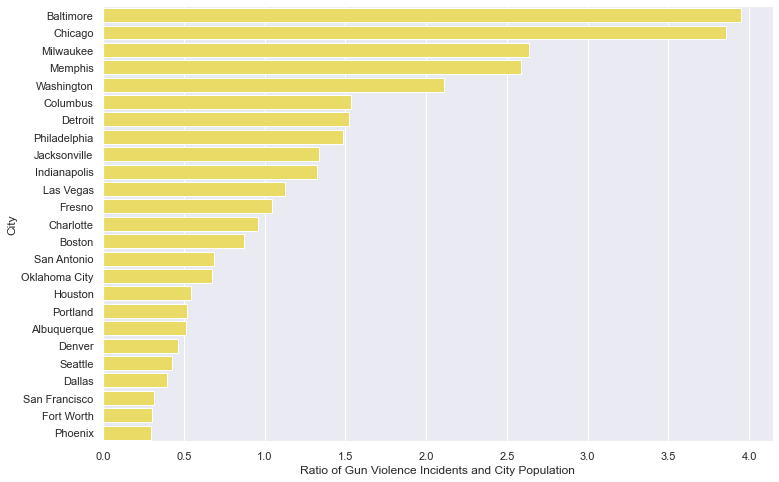

In [331]:
i_p = tempdf.sort_values(['injured_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y='city_or_county', x='injured_population_ratio', data=i_p, color='#ffec4f')
ax.set(xlabel='Ratio of Gun Violence Incidents and City Population', ylabel='City');

In [332]:
# 4. Other Characteristics of Gun Violence Incidents
# 4.1 Number of Guns Used (greater than 1)

In [333]:
df['n_guns'] = df['n_guns_involved'].apply(lambda x : "10+" if x>=10 else str(x))

tempdf = df['n_guns'].value_counts().reset_index()
tempdf = tempdf[tempdf['index'] != 'nan']
tempdf = tempdf[tempdf['index'] != '1.0']

labels = list(tempdf['index'])
values = list(tempdf['n_guns'])

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors = ['#FFE15D', '#F49D1A', '#DC3535', '#B01E68', '#E3C770', '#FECD70', '#FFAE6D', '#F3E0B5', '#fcc771']))
layout = dict(height=500, title='Number of Guns Used (More than 1)', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [334]:
# 4.2 Most Serious Gun Violence Incidents

In [335]:
df1 = df.sort_values(['loss'], ascending=[False])
df1[['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured']].head(10)

,date,state,city_or_county,address,n_killed,n_injured
130448,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53
217151,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20
101531,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19
232745,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17
70511,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18
195845,2017-07-01,Arkansas,Little Rock,220 W 6th St,0,25
137328,2016-07-25,Florida,Fort Myers,3580 Evans Ave,2,19
11566,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16
73,2013-05-12,Louisiana,New Orleans,Frenchmen Street,0,19
92624,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9


In [336]:
smalldf = df[df['n_killed'] >= 3][['latitude', 'longitude', 'loss', 'n_killed']].dropna()
map1 = folium.Map(location=[39.50, -98.35], tiles='CartoDB dark_matter', zoom_start=3.5)
map2 = folium.Map([39.50, -98.35], zoom_start=3.5, tiles='cartodbdark_matter')
markers = []
for i, row in smalldf.iterrows():
    loss = row['loss']
    if row['loss'] > 100:
        loss = row['loss']*0.1    
    folium.CircleMarker([float(row['latitude']), float(row['longitude'])], radius=float(loss), color='#ef4f61', fill=True).add_to(map1)
map1

In [337]:
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]


def returnsize(x):
    if x > 200:
        return 60
    elif x > 80:
        return 40
    elif x > 30:
        return 25
    elif x > 10:
        return 15
    elif x > 5: 
        return 10
    else:
        return 5

df1['size'] = df1['loss'].apply(lambda x: returnsize(x))
dfs = df1.head(50)

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = dfs['longitude'],
        lat = dfs['latitude'],
        text = dfs['city_or_county'],
        mode = 'markers',
        marker = dict(
            size = dfs['size'],
            opacity = 0.5,
            cmin = 0,
        ))]

layout = dict(
        title = 'Most Serious Gun Violence Incidents in US',
        colorbar = True,
        geo = dict(
            projection=dict( type='albers usa' ),
            subunitcolor = "rgb(221, 221, 221)",
            subunitwidth = 1.0
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False)

In [338]:
#4.3 Key characteristics of Gun Violence Incidents

In [339]:
from collections import Counter
big_text = "||".join(df['incident_characteristics'].dropna()).split("||")
incidents = Counter(big_text).most_common(20)
xx = [x[0] for x in incidents]
yy = [x[1] for x in incidents]

trace1 = go.Bar(
    x=yy[::-1],
    y=xx[::-1],
    name='Incident Characterisitcs',
    marker=dict(color='purple'),
    opacity=0.3,
    orientation="h"
)
data = [trace1]
layout = go.Layout(
    barmode='group',
    margin=dict(l=350),
    width=1000,
    height=600,
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'Key Incident Characteristics',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
pred_df = df[['n_killed','n_injured']]

In [342]:
pred_df.loc[pred_df['n_killed'] > 0, 'guilty'] = 1
pred_df.loc[pred_df['n_injured'] >= 2, 'guilty'] = 1
pred_df.loc[(pred_df['n_killed']==0)&(pred_df['n_injured']<=1), 'guilty'] = 0

C:\Users\namra\AppData\Local\Temp\ipykernel_11684\2170661466.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [343]:
pred_df

,n_killed,n_injured,guilty
0,0,4,1.0
1,1,3,1.0
2,1,3,1.0
3,4,0,1.0
4,2,2,1.0
...,...,...,...
239672,0,0,0.0
239673,1,0,1.0
239674,0,1,0.0
239675,1,0,1.0


In [344]:
pred_df['guilty'].value_counts()

0.0    172753
1.0     66924
Name: guilty, dtype: int64

In [345]:
x = pred_df.drop('guilty',axis=1)
y = pred_df['guilty']

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [380]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [381]:
scaler = StandardScaler()

In [382]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [383]:
y_train.isna().sum()

0

In [384]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(scaled_x_train, y_train)

LogisticRegression()

In [385]:
reg.coef_

array([[15.85088559, 10.31036301]])

In [386]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [387]:
y_pred = reg.predict(x_test)

C:\Users\namra\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [388]:
accuracy_score(y_test,y_pred)

0.6853513017356475

In [389]:
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [390]:
confusion_matrix(y_test,y_pred)

array([[19571, 15083],
       [    0, 13282]], dtype=int64)